In [1]:
import nibabel as nib
import nilearn.plotting as niplt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
subs=['sub-075', 'sub-131', 'sub-190', 'sub-201', 'sub-235', 'sub-244',
       'sub-249', 'sub-254', 'sub-255', 'sub-256', 'sub-257', 'sub-258',
       'sub-259', 'sub-260', 'sub-261', 'sub-262', 'sub-263', 'sub-264',
       'sub-265', 'sub-266', 'sub-267', 'sub-268', 'sub-269', 'sub-270',
       'sub-271'] 

d='/jukebox/griffiths/bert-brains/'
layers=['layer_'+str(i) for i in range(13)]
results_prefix=d+'results/21st_year/'
results_dirs=[results_prefix+"rsa-activations_"+layer+"/" for layer in layers]+[results_prefix+"rsa-attentions_"+layer+"/" for layer in layers]
layer_names=['activation_layer_'+str(i) for i in range(13)]+['attention_layer_'+str(i) for i in range(13)][:-1]
results_dirs=results_dirs[:-1]
print(len(results_dirs),len(layer_names))

25 25


0.0027445197668708025

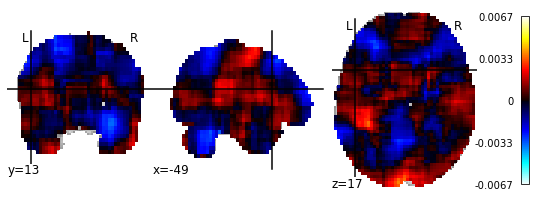

In [3]:
#First Subject
fname=results_dirs[13]+subs[0]+"_whole_brain_anatomical_SL.nii.gz"
niplt.plot_stat_map(fname,cut_coords=(-49,13,17))
x=nib.load(fname).get_fdata()
x[x>=np.percentile(x,99)].mean()

In [7]:
len(fnames)

25

0
1
2
3
4
5
6
7
8
9
10


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


11
12
13
14
15
16
17
18
19
20
21
22
23
24


<Figure size 432x288 with 0 Axes>

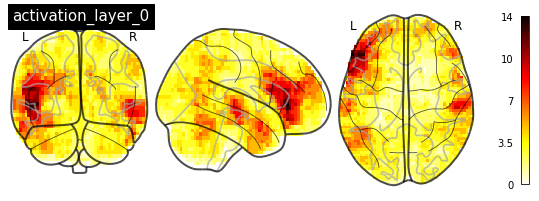

<Figure size 432x288 with 0 Axes>

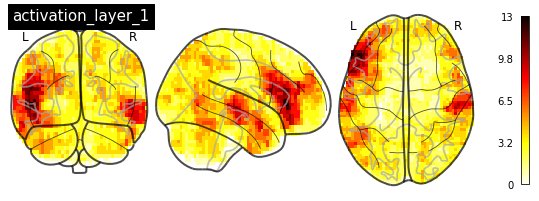

<Figure size 432x288 with 0 Axes>

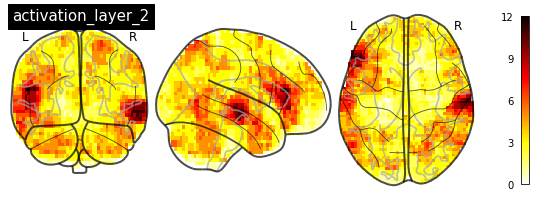

<Figure size 432x288 with 0 Axes>

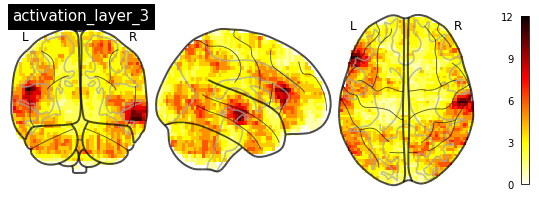

<Figure size 432x288 with 0 Axes>

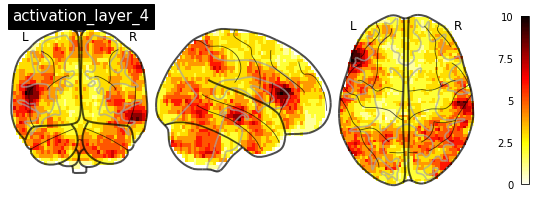

<Figure size 432x288 with 0 Axes>

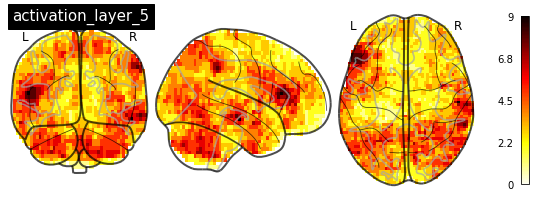

<Figure size 432x288 with 0 Axes>

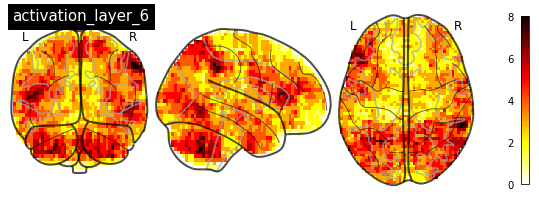

<Figure size 432x288 with 0 Axes>

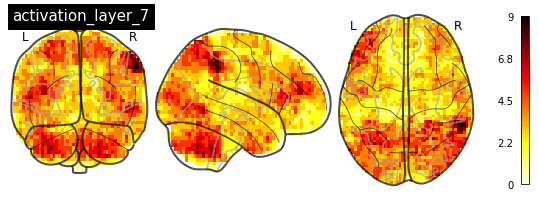

<Figure size 432x288 with 0 Axes>

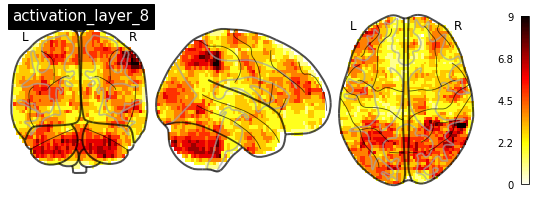

<Figure size 432x288 with 0 Axes>

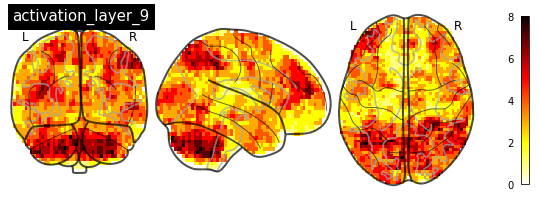

<Figure size 432x288 with 0 Axes>

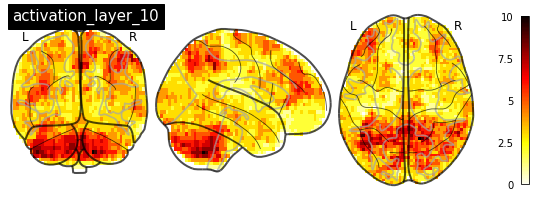

<Figure size 432x288 with 0 Axes>

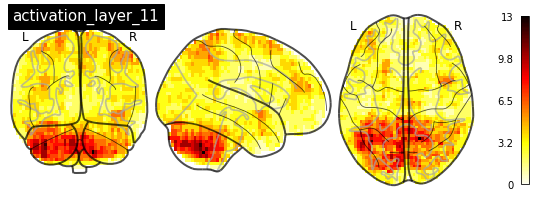

<Figure size 432x288 with 0 Axes>

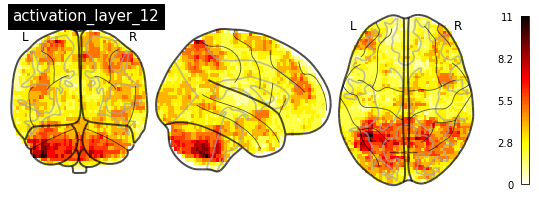

<Figure size 432x288 with 0 Axes>

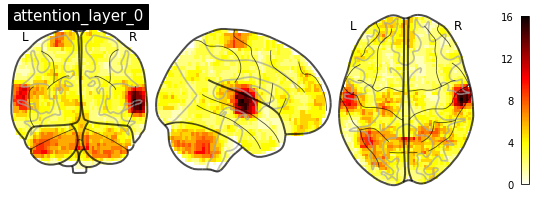

<Figure size 432x288 with 0 Axes>

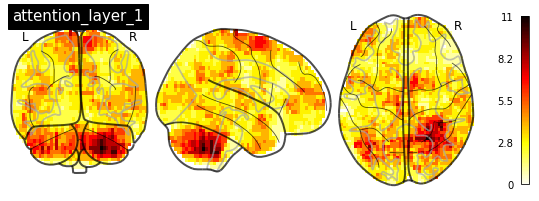

<Figure size 432x288 with 0 Axes>

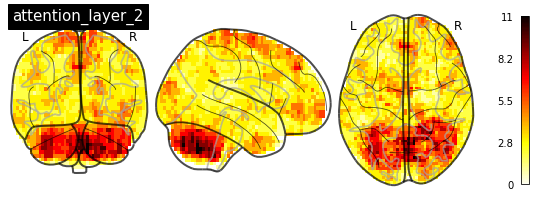

<Figure size 432x288 with 0 Axes>

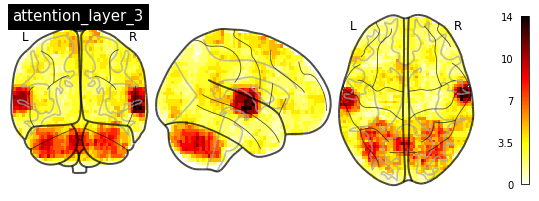

<Figure size 432x288 with 0 Axes>

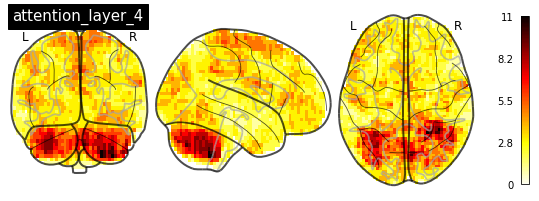

<Figure size 432x288 with 0 Axes>

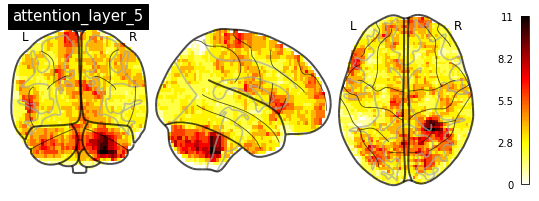

<Figure size 432x288 with 0 Axes>

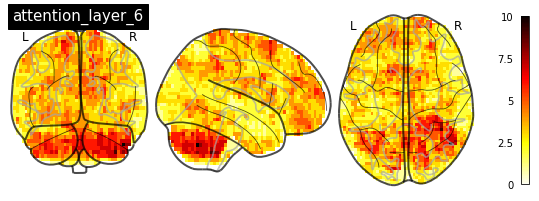

<Figure size 432x288 with 0 Axes>

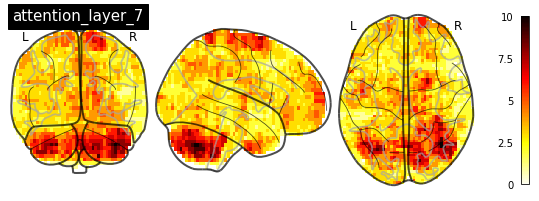

<Figure size 432x288 with 0 Axes>

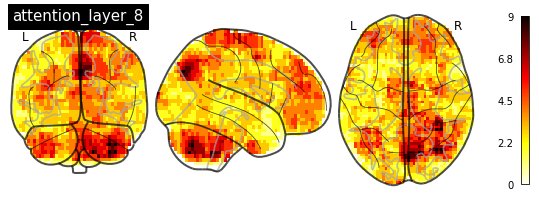

<Figure size 432x288 with 0 Axes>

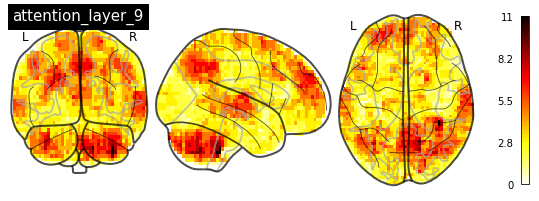

<Figure size 432x288 with 0 Axes>

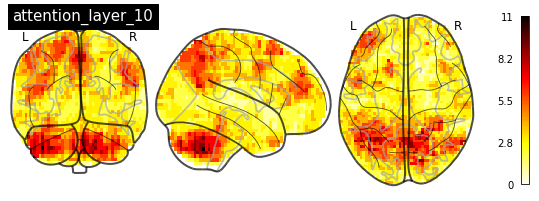

<Figure size 432x288 with 0 Axes>

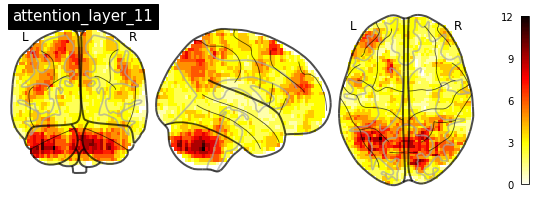

In [15]:
#Anatomical Searchlight Visualizations
for i in range(25):
    print(i)
    results_dir=results_dirs[i]

    fnames=[results_dir+sub+"_whole_brain_anatomical_SL.nii.gz" for sub in subs]
    mask_nii=nib.load("/jukebox/griffiths/bert-brains/21styear_data/whole_brain_mask.nii.gz")
    affine=mask_nii.affine
    mask=mask_nii.get_fdata().astype('bool')
    volumes=[]
    for fname in fnames:
        nii=nib.load(fname)
        data=nii.get_fdata()
        data[np.isnan(data)]=0
        threshold=np.percentile(data[mask],95)
        volumes.append((data>=threshold)*mask)
        affine=nii.affine
    volumes=np.asarray(volumes)
    plt.figure()
    img=nib.Nifti1Image(np.sum(volumes,axis=0),affine)
    niplt.plot_glass_brain(img,title=layer_names[i],colorbar=True)

0
1
2
3
4
5
6
7
8
9
10


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


11
12
13
14
15
16
17
18
19
20
21
22
23
24


<Figure size 432x288 with 0 Axes>

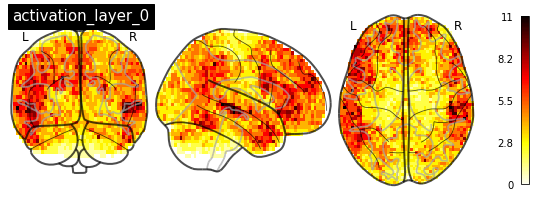

<Figure size 432x288 with 0 Axes>

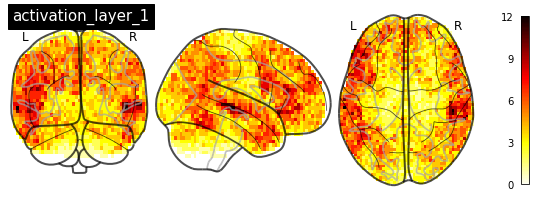

<Figure size 432x288 with 0 Axes>

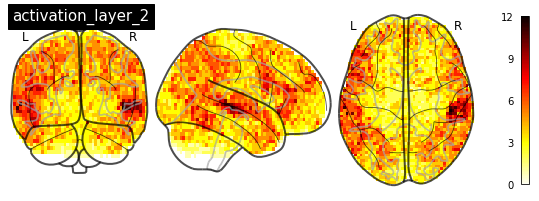

<Figure size 432x288 with 0 Axes>

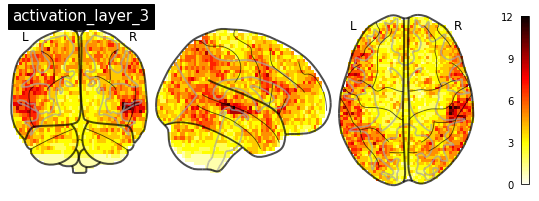

<Figure size 432x288 with 0 Axes>

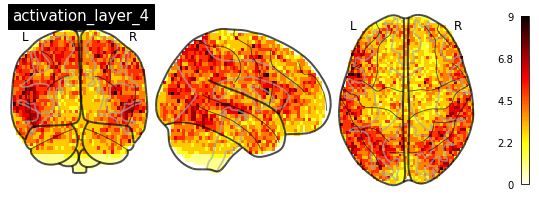

<Figure size 432x288 with 0 Axes>

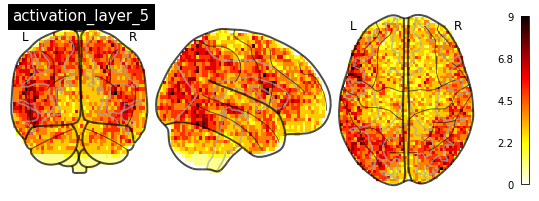

<Figure size 432x288 with 0 Axes>

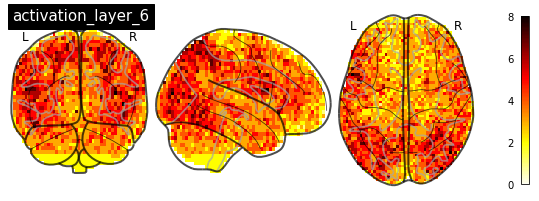

<Figure size 432x288 with 0 Axes>

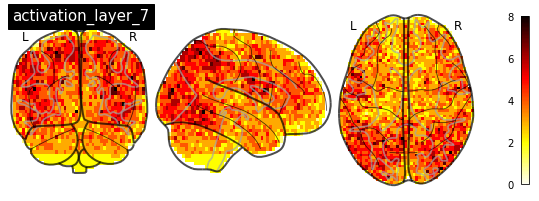

<Figure size 432x288 with 0 Axes>

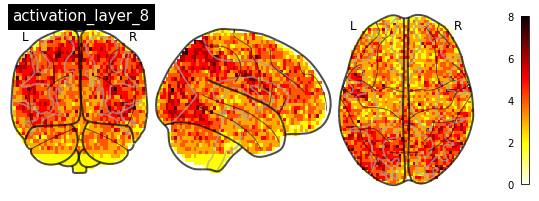

<Figure size 432x288 with 0 Axes>

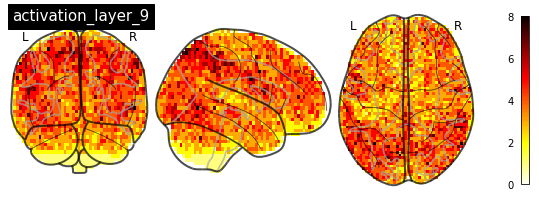

<Figure size 432x288 with 0 Axes>

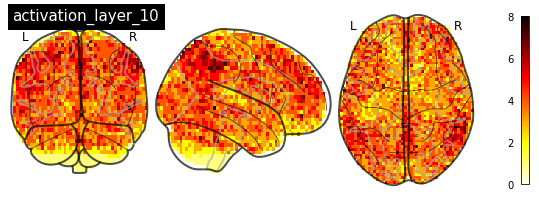

<Figure size 432x288 with 0 Axes>

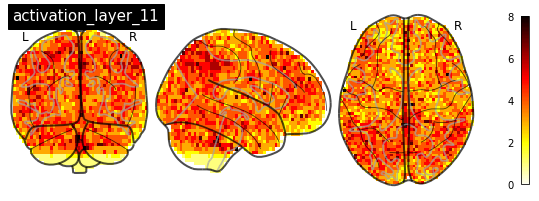

<Figure size 432x288 with 0 Axes>

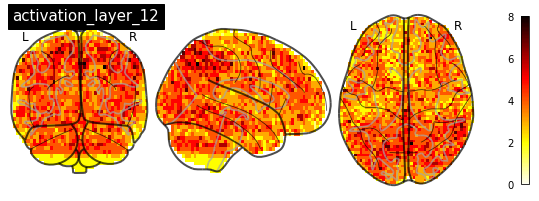

<Figure size 432x288 with 0 Axes>

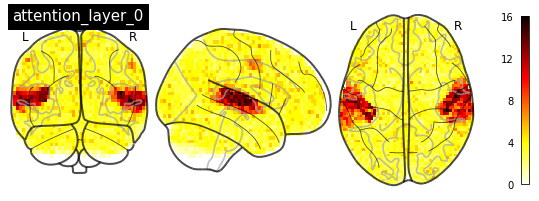

<Figure size 432x288 with 0 Axes>

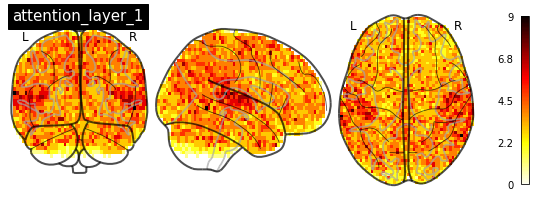

<Figure size 432x288 with 0 Axes>

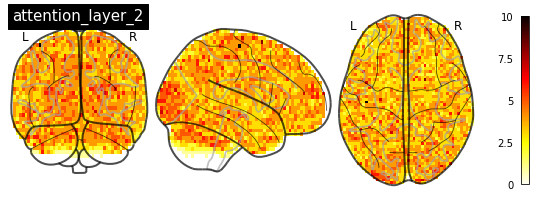

<Figure size 432x288 with 0 Axes>

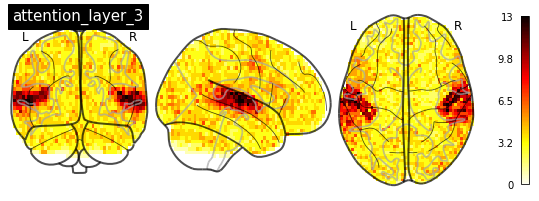

<Figure size 432x288 with 0 Axes>

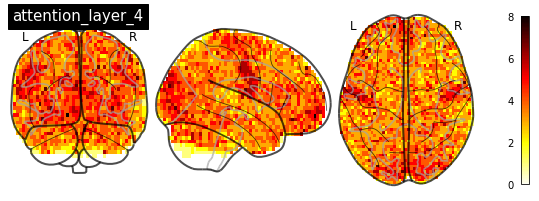

<Figure size 432x288 with 0 Axes>

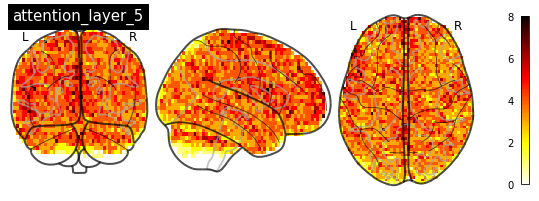

<Figure size 432x288 with 0 Axes>

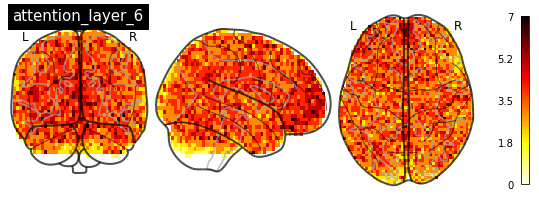

<Figure size 432x288 with 0 Axes>

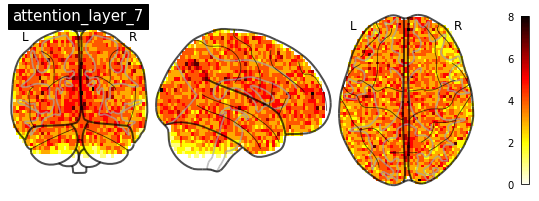

<Figure size 432x288 with 0 Axes>

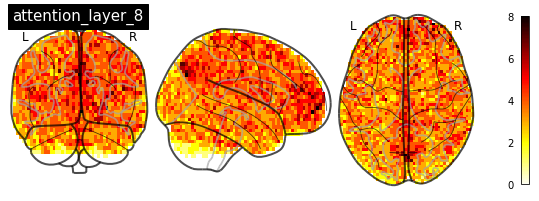

<Figure size 432x288 with 0 Axes>

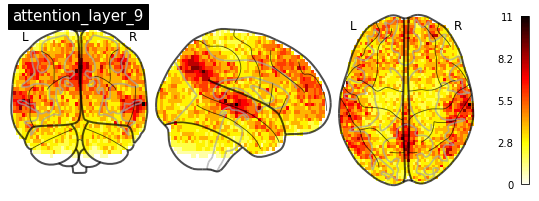

<Figure size 432x288 with 0 Axes>

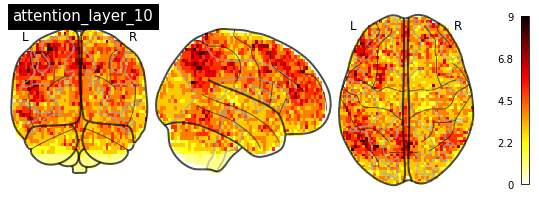

<Figure size 432x288 with 0 Axes>

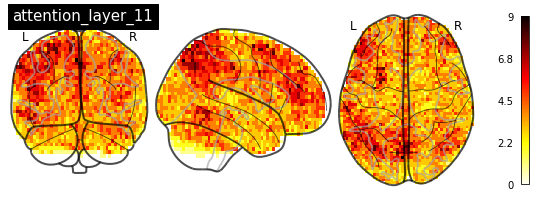

In [16]:
#Functional Searchlight Visualizations
for i in range(25):
    print(i)
    results_dir=results_dirs[i]

    fnames=[results_dir+sub+"_whole_brain_functional_SL.nii.gz" for sub in subs]
    mask_nii=nib.load("/jukebox/griffiths/bert-brains/21styear_data/whole_brain_mask.nii.gz")
    affine=mask_nii.affine
    mask=mask_nii.get_fdata().astype('bool')
    volumes=[]
    for fname in fnames:
        nii=nib.load(fname)
        data=nii.get_fdata()
        
        threshold=np.nanpercentile(data[mask],95)
        data[np.isnan(data)]=0
        volumes.append((data>=threshold)*mask)
        affine=nii.affine
    volumes=np.asarray(volumes)
    plt.figure()
    img=nib.Nifti1Image(np.sum(volumes,axis=0),affine)
    niplt.plot_glass_brain(img,title=layer_names[i],colorbar=True)

In [49]:
results_f=np.zeros((len(layer_names),len(subs)))
results_a=np.zeros((len(layer_names),len(subs)))
for i in range(len(layer_names)):
    for j in range(len(subs)):
        print(i,j)
        sub=subs[j]
        results_dir=results_dirs[i]
        fname_anat=results_dir+sub+"_whole_brain_anatomical_SL.nii.gz"
        fname_func=results_dir+sub+"_whole_brain_functional_SL.nii.gz"
        anat_data=nib.load(fname_anat).get_fdata()[mask]
        anat_data=anat_data[~np.isnan(anat_data)]
        a=anat_data[anat_data>=np.percentile(anat_data,95)]
        
        func_data=nib.load(fname_func).get_fdata()[mask]
        func_data=func_data[~np.isnan(func_data)]
        f=func_data[func_data>=np.percentile(func_data,95)]
        
        results_f[i,j]=np.mean(f)
        results_a[i,j]=np.mean(a)
        #print(results_f[i,j],results_a[i,j])
    

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17


[-0.00036347  0.00023099] -6.879534734968381e-05
[-0.00027894  0.0004092 ] -0.00011668064219546057
[-0.00030913  0.0001068 ] -0.00014028574856720668
[-3.15171998e-04  1.92561855e-05] -0.00013740824203917627
[-3.88533486e-04  6.95988802e-05] -0.00014440755644059273
[-3.37267079e-04 -7.92937967e-05] -0.00016371593880315803
[-2.26958343e-04 -3.49306256e-05] -0.00017776407996532347
[-3.47025486e-04 -2.63045808e-05] -0.00018074360496263253
[-0.00045645 -0.00010274] -0.0002562025045909364
[-0.00051222 -0.00020147] -0.000355254178890719
[-0.00061654 -0.00036068] -0.0004966149743349016
[-0.00075082 -0.00049112] -0.0005950656794901208
[-0.00065561 -0.00035865] -0.0005025175457387288
[-0.00041441 -0.0001103 ] -0.00024131153872378294
[-0.00074605 -0.00023502] -0.000515307449074012
[-0.00058121 -0.00031262] -0.00045197318059964493
[-0.00068974 -0.00028638] -0.00048320527998749907
[-0.00065251 -0.00039563] -0.0005463165911837571
[-0.00066875 -0.00032527] -0.0004794955443969434
[-0.00048752 -0.00015

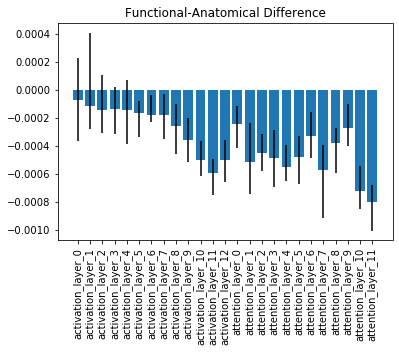

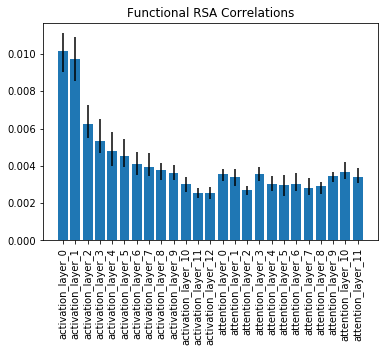

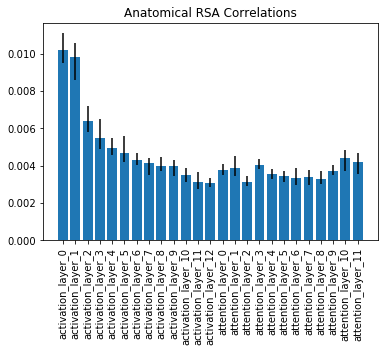

In [50]:
diff=results_f-results_a

def plot_barplot_w_CI(full_data,title):
    error_bars=[]
    mean_data=[]
    for i in range(len(layer_names)):
        layer_data=full_data[i]
        boots=[]
        for i in range(19):
            boots.append(np.mean(np.random.choice(layer_data,replace=True,size=len(layer_data))))
        boots_ci=np.percentile(boots,(2.5,97.5))
        mean=np.mean(layer_data)
        error_bars.append([mean-boots_ci[0],boots_ci[1]-mean])
        print(boots_ci,mean)
        mean_data.append(mean)
    error_bars=np.asarray(error_bars)
    plt.bar(range(25),mean_data,yerr=error_bars.T)
    plt.title(title)
    plt.xticks(range(25),layer_names,rotation=90)
plot_barplot_w_CI(diff,"Functional-Anatomical Difference")
plt.figure()
plot_barplot_w_CI(results_f,"Functional RSA Correlations")
plt.figure()
plot_barplot_w_CI(results_a,"Anatomical RSA Correlations")